In [1]:
import pandas as pd

In [200]:
df = pd.read_csv('Salary_dataset.csv')

In [201]:
# Checando o dataset
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [202]:
# renomeando colunas (salario foi mantido original, há um bug no dataset ou algo do tipo)
df.rename(columns={"Unnamed: 0":"OBSERVACAO","YearsExperience":"Anos de experiencia"}, inplace=True)

In [203]:
# Removendo a contagem
df.drop('OBSERVACAO', axis=1, inplace=True)

In [194]:
df.set_index('Anos de experiencia', inplace=True)

In [191]:
# importando bibliotecas gráficas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


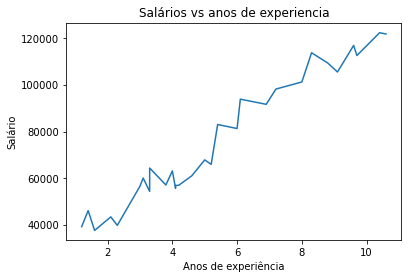

In [196]:
# Plotando as variáveis
plt.plot(df)
plt.ylabel('Salário')
plt.xlabel('Anos de experiência')
plt.title('Salários vs anos de experiencia')
plt.show()

In [197]:
# Estatísticas descritivas
df.describe()

,Salary
count,30.000000
mean,76004.000000
std,27414.429785
min,37732.000000
25%,56721.750000
50%,65238.000000
75%,100545.750000
max,122392.000000


In [205]:
# importando bibliotecas estatísticas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [116]:
import numpy as np

In [210]:
# Separando os dados
X = df['Anos de experiencia']
y = df['Salary']

In [211]:
# Transformando em dados bidimensionais
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [212]:
# Separando dados de treino e teste
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.3)

In [213]:
# Rodando o modelo
model = LinearRegression()
model.fit(X_Train, Y_Train)
y_pred = model.predict(X_Test)

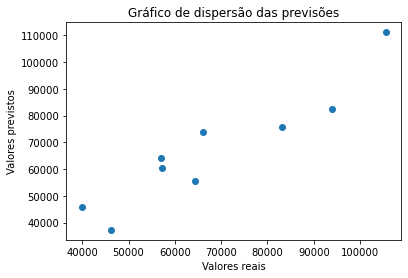

In [176]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

# Calculando métricas
mse = mean_squared_error(Y_Test, y_pred)
r2 = r2_score(Y_Test, y_pred)

# Plotando gráfico de dispersão com as previsões
plt.scatter(Y_Test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Gráfico de dispersão das previsões')
plt.show()

In [183]:
 import statsmodels.api as sm

In [214]:
# Rodando o modelo pelo statsmodels e obtendo métricas
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        22:24:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.485e+04   2